
# CHEM 301: Plotting and nonlinear curve fitting using Python
# Part 2: Reading in data from a file and fitting the data

This script includes a demonstration of fitting a function with the Van der Waals equation.  There are alot of similarities of this script
with the Part 2 script.  Note that one big different is that the data used here are pressure/volume (or PV) data from a gas.  This pressure is NOT the saturated vapor pressure of a substance that was used with the Antoine equation.  These data are the pressure and volume of a gas sample for a given temperature.

Recall that the Van der Waals equation is:

$P = \dfrac{nRT}{V-nb} -a\dfrac{n^2}{V^2}$.

Here $P, T, V,$ and $n$ are the pressure, temperature, volume and amount of the gas, respevtively and $R$ is the gas constant.  The other parameters, $a$ and $b$ are
empirical parameters that depend on the gas.  

which can also be written as:

$P = \dfrac{RT}{\overline{V}-b} -a\dfrac{1}{\overline{V}}$

where $\overline{V}$ is the molar volume of the gas ($\frac{V}{n}$)

One thing we need to do is read in data; we can do that with a numpy function called `np.genfromtxt()`. The first arugment is the name (string) of the data file.  This file must be in the same directory as your notebook file.  The option `skip_header` allows you to skip the header of the file, just have to denote how many lines to skip `delimiter` is the character that is used to separate values.  In this case, we have a CSV file, which generally means "comma separated values". Thus, our delimiter is a comma.


vdw a parameter:
3.469
vdw b parameter:
0.04854


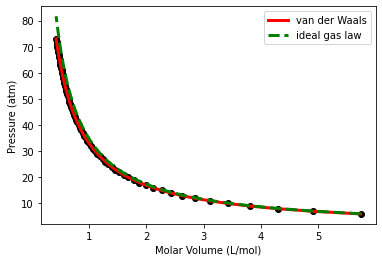

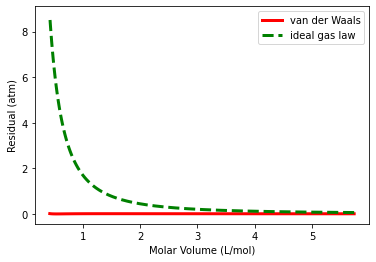

In [2]:
# Load libraries and Read in data file.
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

DataFile = 'co2-pv-150degC.csv'
DataArray = np.genfromtxt(DataFile,skip_header=2,delimiter=",")
Xvals = DataArray[:,1]
Yvals = DataArray[:,0]

# Note the units of the molar volume, which is the second column of the file.  We want to convert mL/g to L/mol:
Xvals = Xvals/1000.0*44.0 # need to convert molar volume to L/mol

# First let's define R and Temp as variables that we will use later.
R = 0.08206 # L atm / (mol K)
Temp = 150  # deg C

# Define VDW equation in terms of molar volume 
def vanderWaals(x,a,b):
    return R*(Temp+273.15)/(x - b) - a/(x*x)

# initial guess of a and b parameters in VDW
p0 = np.array([3.6,0.04])

# Do the curve fitting:
popt,pcov = curve_fit(vanderWaals,Xvals,Yvals,p0,maxfev=100000000)
# Now Plotting:
plt.scatter(Xvals,Yvals,color ="black", lw=1) # data
plt.plot(Xvals,vanderWaals(Xvals,popt[0],popt[1]),color="red",label='van der Waals',linewidth=3) # fit
plt.plot(Xvals,vanderWaals(Xvals,0,0),color="green",label='ideal gas law',linewidth=3,linestyle='--') # ideal gas law

print('vdw a parameter:')
print("%.4g" % popt[0])
print('vdw b parameter:')
print("%.4g" % popt[1])

plt.xlabel("Molar Volume (L/mol)")
plt.ylabel("Pressure (atm)")
plt.legend()
plt.show()

#plot the residuals
plt.plot(Xvals,(vanderWaals(Xvals,popt[0],popt[1])-Yvals),color="red",label='van der Waals',linewidth=3)
plt.plot(Xvals,(vanderWaals(Xvals,0,0)-Yvals),color='green',label='ideal gas law',linewidth=3,linestyle='--')
plt.xlabel("Molar Volume (L/mol)")
plt.ylabel("Residual (atm)")
plt.legend()

Now it's up to you to explore the fitting on your own.  It is a good idea to start new cells and copy/paste from old cells, so that you can always go back and look at what you have changed.  To insert a new cell, you can just click the `+` button on the top ribbon of this editor.  One first item to try is just change the isotherm of CO2 that you are fitting.  In this example, we fit the 30 deg C data.  Change your input file to the 70 deg C or 150 deg C data and see how the fitted `a` and `b` parameters change.  Then, enter your own literature data in and fit those data.

In [ ]:
# Fit other CO2 data 

Next, fit your own data with the van der Waals equation.  Make sure you take care of any unit conversions!

In [ ]:
# Fit your data with vdW

Now, create the Virial equation - fit the CO2 data, and fit your data.

In [ ]:
# Create the Virial Equation